In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
column_num=563
rule_num=32
contributions_up=[]
for i in range(rule_num):
    contributions_up.append([0]*column_num)
t=[]
rules={}

In [3]:
rule_names=['rule_diffusion_polymer',
'rule_TT_polymerize_horizontal_plus', 'rule_depolymerize_plus_TT', 'rule_depolymerize_plus_TD', 'rule_depolymerize_plus_DD',
'rule_annealing_TT', 'rule_annealing_TD',
'rule_fragmentate_TT', 'rule_fragmentate_TD', 'rule_fragmentate_DD',
'rule_bundling', 'rule_debundling', 'rule_attatch', 'rule_anchoring', 'rule_deanchoring',
'rule_hydrolysis_TTT', 'rule_hydrolysis_TTD', 'rule_hydrolysis_DTD',
'rule_empty_anchor_diffusion',
'rule_rotation',
'rule_TT_polymerize_vertical_plus',
'rule_bundling_inverse',
'rule_debundling_inverse',
'rule_TT_polymerize_horizontal_minus',
'rule_TT_polymerize_vertical_minus',
'rule_TD_polymerize_vertical_plus',
'rule_TD_polymerize_vertical_minus',
'rule_TD_polymerize_horizontal_plus',
'rule_TD_polymerize_horizontal_minus',
'rule_depolymerize_minus_TT', 'rule_depolymerize_minus_TD', 'rule_depolymerize_minus_DD']
rule_names=np.array(rule_names)

In [114]:
column_num=563
rule_num=32
contributions_up=[]
contributions_down=[]
for i in range(rule_num):
    contributions_up.append([0]*column_num)
    contributions_down.append([0]*column_num)
t=[]
rules={}
filename='propensity_statistics_up.txt'
file=open(filename,'r')
data=file.readline()
while(data):
    data=data.split()
    t.append(data[0])
    rule=int(data[1])
    if rule not in rules:
        rules[rule]=1
    else:
        rules[rule]+=1
    for index in range(2,len(data),2):
        contributions_up[rule][int(data[index])]+=float(data[index+1])
#         print(rule,int(data[index]),float(data[index+1]))
#         if rule==12 and float(data[index+1])>0:
#             print(data[0],data[index+1])
#     print(rule)
    data=file.readline()
        
# print(data)
file.close()

column_num=563
rule_num=32



filename='propensity_statistics_down.txt'
file=open(filename,'r')
data=file.readline()
while(data):
    data=data.split()
    t.append(data[0])
    rule=int(data[1])
    
    for index in range(2,len(data),2):
        contributions_down[rule][int(data[index])]+=float(data[index+1])
#         print(rule,int(data[index]),float(data[index+1]))
#     print(rule)
    data=file.readline()
        
# print(data)
file.close()

In [85]:
if 14 in rules:
    del rules[14]#del deanchoring
    contributions_up[14]=[0]*column_num
    contributions_down[14]=[0]*column_num
if 12 in rules:
    del rules[12]#del attatch
    contributions_up[12]=[0]*column_num
    contributions_down[12]=[0]*column_num
if 5 in rules:
    del rules[5]#del annealing_TT
    contributions_up[5]=[0]*column_num
    contributions_down[5]=[0]*column_num
if 6 in rules:
    del rules[6]#del annealing_TD
    contributions_up[6]=[0]*column_num
    contributions_down[6]=[0]*column_num
if 13 in rules:
    del rules[13]#del anchoring
    contributions_up[13]=[0]*column_num
    contributions_down[13]=[0]*column_num

Text(0,0.5,'accumulated propensity change')

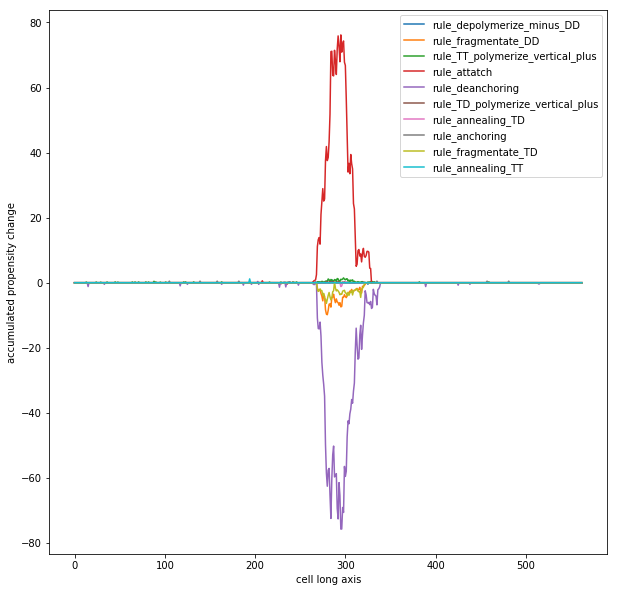

In [115]:
plt.figure(figsize=[10,10])
for i in rules.keys():
    plt.plot(range(column_num),contributions_up[i],label=rule_names[i])
plt.legend()
plt.xlabel('cell long axis')
plt.ylabel('accumulated propensity change')


Text(0,0.5,'accumulated propensity change')

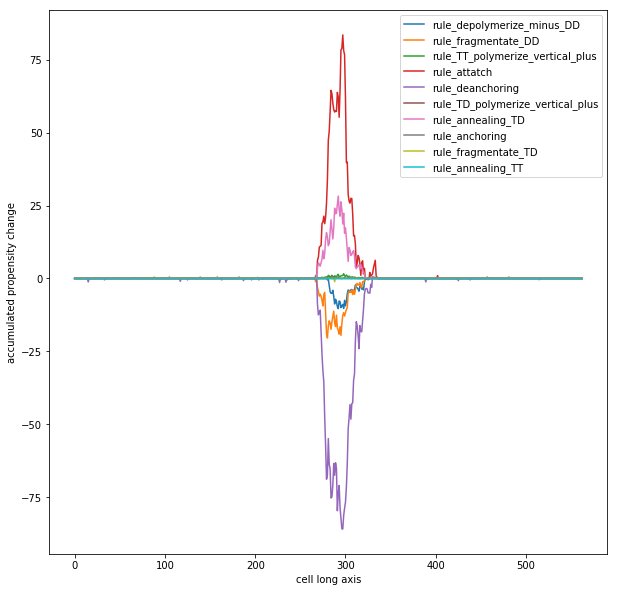

In [116]:
plt.figure(figsize=[10,10])
for i in rules.keys():
    plt.plot(range(column_num),contributions_down[i],label=rule_names[i])
plt.legend()
plt.xlabel('cell long axis')
plt.ylabel('accumulated propensity change')

Text(0,0.5,'accumulated propensity change')

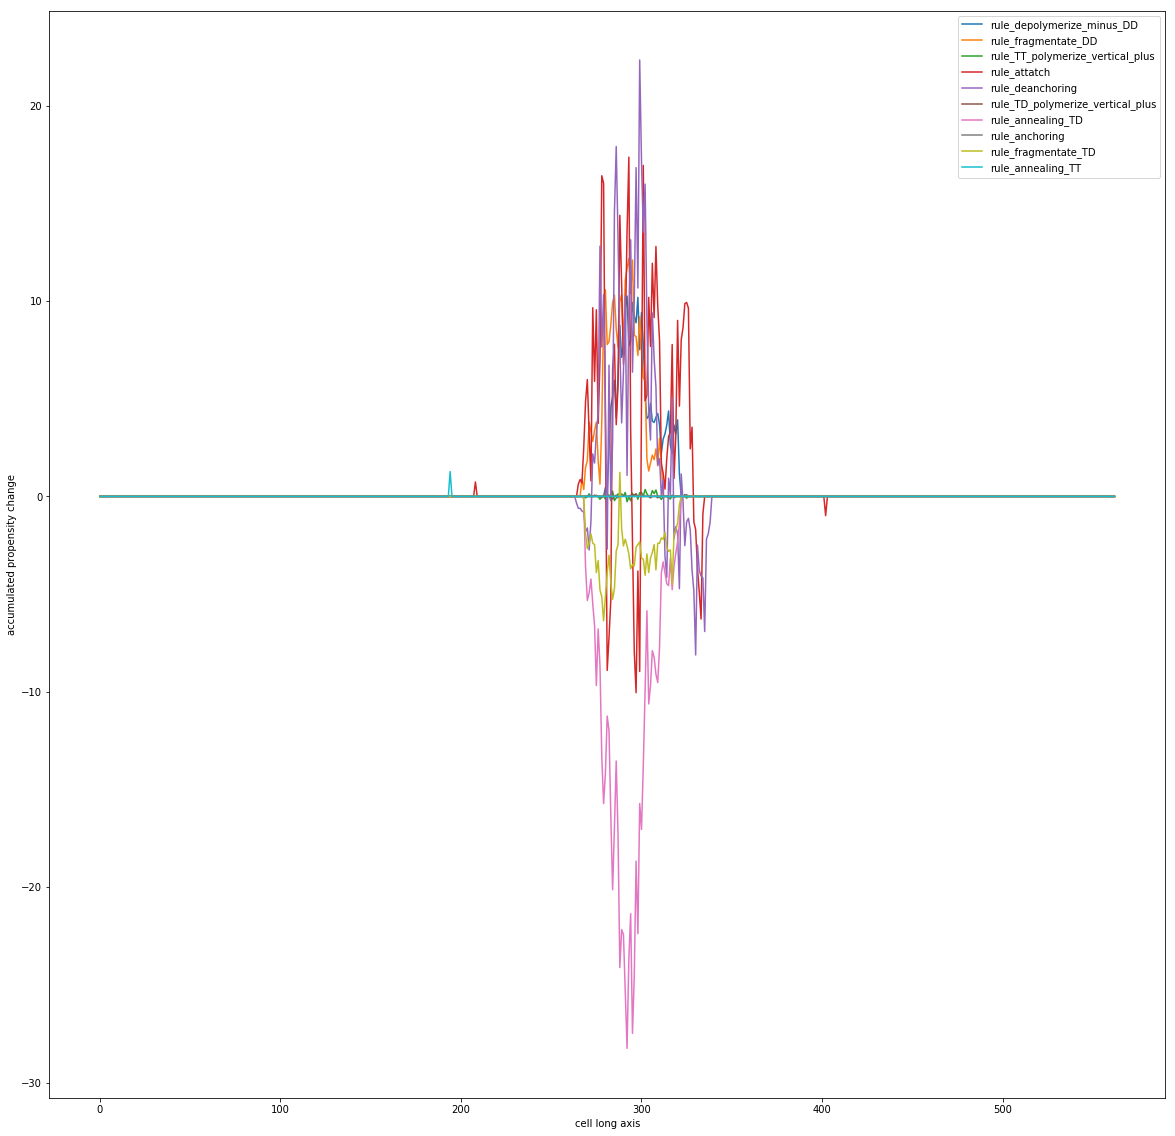

In [117]:
contributions_up=np.array(contributions_up)
contributions_down=np.array(contributions_down)
contributions=contributions_up-contributions_down
plt.figure(figsize=[20,20])
for i in rules.keys():
    plt.plot(range(column_num),contributions[i],label=rule_names[i])
plt.legend()
plt.xlabel('cell long axis')
plt.ylabel('accumulated propensity change')

In [122]:
np.sum(contribution_sum_plus)

968.7310544314819

In [123]:
np.sum(contribution_sum_minus)

-713.3448453200002

In [48]:
contribution_sum_minus

array([-1.11022000e-16, -1.98123335e+00, -8.24622104e-01, -1.96384218e-03,
       -3.81862594e-01])

In [49]:
rule_names_minus

array(['rule_fragmentate_TT', 'rule_fragmentate_TD',
       'rule_fragmentate_DD', 'rule_TT_polymerize_vertical_plus',
       'rule_TD_polymerize_vertical_plus'], dtype='<U35')

In [349]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

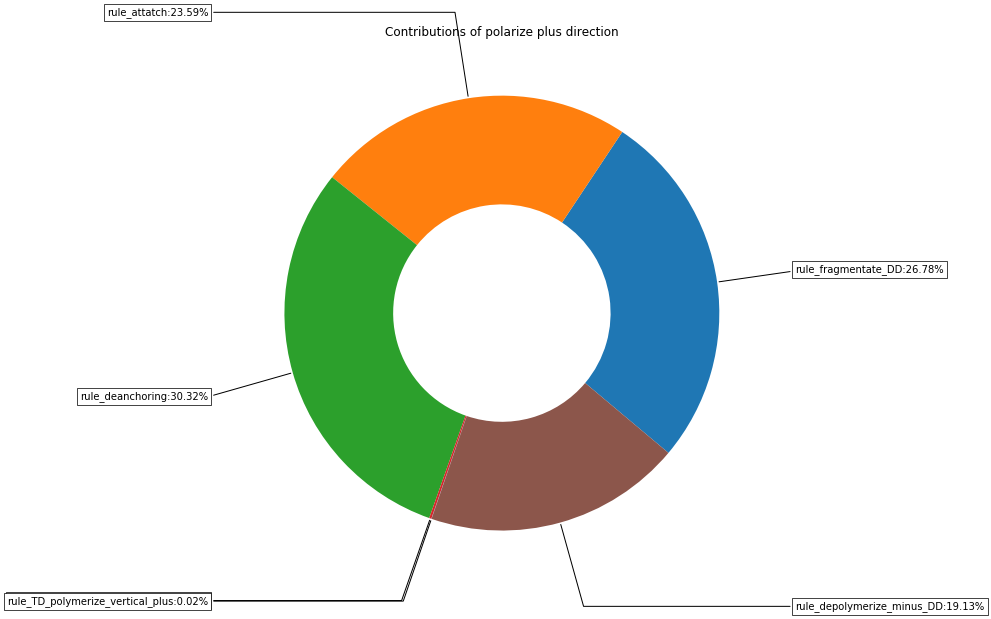

In [120]:
contribution_sum=np.sum(contributions[:,250:310],axis=1)
contribution_sum_plus=contribution_sum[contribution_sum>0]
rule_names_plus=rule_names[contribution_sum>0]
contribution_sum_minus=contribution_sum[contribution_sum<0]
rule_names_minus=rule_names[contribution_sum<0]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

temp_sum=sum(abs(contribution_sum_plus))

wedges, texts = ax.pie(abs(contribution_sum_plus), wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(rule_names_plus[i]+':'+str(round(abs(contribution_sum_plus[i])/temp_sum*100,2))+'%', xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Contributions of polarize plus direction")

plt.show()

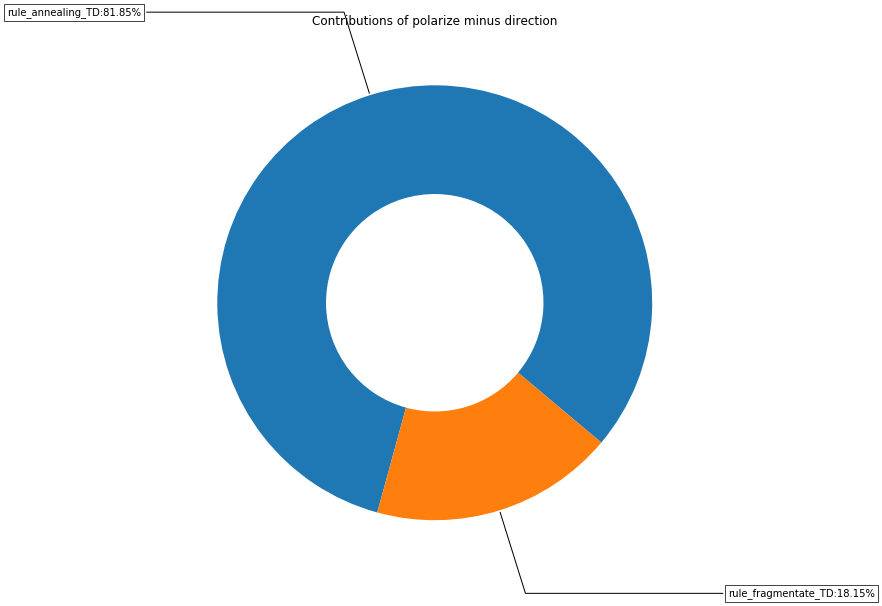

In [121]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

temp_sum=sum(abs(contribution_sum_minus))

wedges, texts = ax.pie(abs(contribution_sum_minus*1000), wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(rule_names_minus[i]+':'+str(round(abs(contribution_sum_minus[i])/temp_sum*100,2))+'%', xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Contributions of polarize minus direction")

plt.show()

In [102]:
rule_names[12]

'rule_attatch'